# Assignment 2 - Logistic Regression
> **FULL MARKS = 100**

In this assignment, you are going to implement your own logistic Regression function. Please notice **no** library versions of logistic regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional. The process is similar to the previous assignment. 

***Initialization***

*No more library allowed*

In [1]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import scipy.optimize as opt

Load data *(Do not modify)*
_________

We use 100 samples and 2 features. 


In [2]:
x, y = load_iris(return_X_y=True)

In [3]:
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]

In [4]:
theta = np.zeros(x.shape[1])

Visualize data
___________

In [5]:
# draw raw data
def draw_data(x,y):
    
    #########################################################################
    # Full Mark: 10                                                         #    
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################

    colors = iter(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
    # split into classes so can have label
    for clas in np.unique(y):
        # plot points with class
        plt.scatter(x[np.where(y == clas),0], x[np.where(y == clas),1], c = next(colors), label = f'Class {clas}')
    # TODO DRAW LINE BOUNDARY
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.title("Iris Dataset")
    plt.legend()

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to below

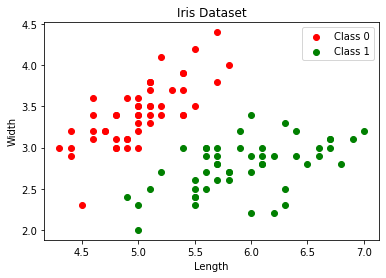

In [6]:
draw_data(x,y)

Sigmoid function
________________

In [7]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(z):
    #########################################################################
    # Full Mark: 10                                                         # 
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input z
    #########################################################################
    
    # sigmoid = 1/(1+e^(-x)) = e^x / (e^x + 1)
    s = 1 / (1 + np.exp(-z))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    return s

Cost function
____________

In [16]:
# define cost function with sigmoid function
def cost(theta, X, y):
    #########################################################################
    # Full Mark: 20                                                         # 
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    #########################################################################
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    co = np.sum(first - second) / len(X)
    print(co)
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return co

calculate gradients
________________

In [20]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    #########################################################################
    # Full Mark: 20                                                         # 
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    print(grad)
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return grad

In [14]:
# predict for new X
def predict(theta, X):
    #########################################################################
    # Full Mark: 15                                                         # 
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################
    
    probability = sigmoid(X * theta.T)
    predict_labels = [1 if x >= 0.5 else 0 for x in probability]
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    return predict_labels

In [13]:
# calculate accuracy
def accurate(predictions, y):
    #########################################################################
    # Full Mark: 10                                                         # 
    # TODO:                                                                 #
    # 1. calculate the accuracy value                                       #
    # Note that you coud not import extra library                           #
    #########################################################################
    
    theta_min = np.matrix(result[0])
    predictions = predict(theta_min, X)
    correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
    accuracy_score = (sum(map(int, correct)) % len(correct))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return accuracy_score

Calling functions
________

In [21]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
final_theta = result[0]
final_cost = cost(final_theta, x, y)
predictions = predict(final_theta, x)
accuracy = accurate(predictions, y)

69.31471805599453
[1.27897692e-15 5.68434189e-16]
69.31471805599453


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy))

final cost is 0.05171994454250328
accuracy is 0.5


**Decsion boudary** 

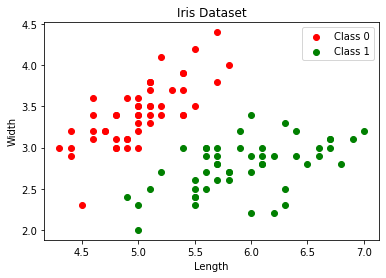

In [21]:
    #########################################################################
    # Full Mark: 15                                                         # 
    # TODO:                                                                 #
    # 1. plot the decision boudary on the raw data                          #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    
    colors = iter(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
    # split into classes so can have label
    for clas in np.unique(y):
        # plot points with class
        plt.scatter(x[np.where(y == clas),0], x[np.where(y == clas),1], c = next(colors), label = f'Class {clas}')
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.title("Iris Dataset")
    plt.legend()

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()